<a href="https://colab.research.google.com/github/BrianArradondo/Sales-Predictions/blob/main/Project_1_Final_Brian_Arradondo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries**

In [1]:
# Typical Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Modeling & Preprocessing import
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import set_config
set_config(display='diagram')
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Read in the Data

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/sales_predictions.csv")

# This Data is information related to the various tracked components related to Grocery Store outlets, types, sizes, products, product categories, product descriptions, weights and nutritional content. 

In [3]:
df.head() # This line of code reveals a look at the first 5 lines of my Data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## This Data has 8,523 Rows of information sorted into 12 columns categories.

### Each row represents specific information related to one feature, for example, one row shares the Item Weight. Another shares the Item Fat Content

In [4]:
df.info() # This line of code shares a look at our data from a high level so that early identification of some needed changes can be spotted. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
df.describe(include="number") # This line of code gives a descriptive look at the numbers and stats in our data initially

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
df.isna().sum() # This line of code reveals how many missing values we have in our untouched data

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

- We have missing data in two columns 

In [ ]:
df.shape # This line of code tells us the general shape of our data

(8523, 12)

In [ ]:
print(f"There are {df.shape[0]}, rows and {df.shape[1]} columns in our dataframe")

There are 8523, rows and 12 columns in our dataframe


In [ ]:
df.duplicated().sum() # This line of code reveals there are no duplicates in our data so there is no need to drop any duplicates

0

In [ ]:
# We will approach our missing values 
df["Item_Weight"].value_counts()

12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: Item_Weight, Length: 415, dtype: int64

In [ ]:
df["Item_Fat_Content"].value_counts() # These rows need to be renamed to reflect the names utilized for those designations

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [ ]:
df = df.replace({"LF":"Low Fat", "low fat":"Low Fat","reg":"Regular"}) # This line of code helps to fix inconsistencies in our categorical data 
df["Item_Fat_Content"].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [ ]:
#check for unique values
df.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                2
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [ ]:
# This line will drop the Item Identifier column as it has very high cardinality and will negatively impact our results without describing anything about the products that will help predict how many are sold
df = df.drop(columns=["Item_Identifier"])
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
df["Outlet_Type"].value_counts() # This line of code is just to confirm there is no redundancy or need to adjust this category 

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

###Rename the unique row names to match the standards being used

# Format for ML and Train Test Split
- Assign the Target (y) and Features (X)

In [ ]:
X = df.drop(columns = "Item_Outlet_Sales") # This line of code identifies the features and separates from the target
y = df["Item_Outlet_Sales"]
X_train,X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

#Making Column Selectors

##Category Selectors

In [ ]:
cat_selector = make_column_selector(dtype_include="object")
cat_selector(df) # This line of code reveals the columns that have categorical Data

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

###Number Selectors

In [ ]:
num_selector = make_column_selector(dtype_include='number')
num_selector(df)

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales']

#Match Transformer with Columns

In [ ]:
#Add One Hot encoder
ohe = OneHotEncoder(sparse_output= False,handle_unknown="ignore") # this line of code was adjusted to make the final preprocessed data appear as a Numpy array
#add the Scaler
scaler = StandardScaler()


# **Preprocessing Object for Data to Prep for ML**

## Instantiate transformers

In [ ]:
# Add Imputers
freq_imputer = SimpleImputer(strategy="most_frequent")
mean_imputer = SimpleImputer(strategy="mean")


##Instantiate Pipelines 

In [ ]:
# Numerical Pipeline
num_pipe = make_pipeline(mean_imputer,scaler)
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [ ]:
#Categorical Pipeline
cat_pipe = make_pipeline(freq_imputer, ohe)
cat_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

# Instantiate the Column transformer

In [ ]:
# Tuples for Column Transformer
num_tuple = (num_pipe, num_selector)
cat_tuple = (cat_pipe, cat_selector)
# ColumnTransformer
preprocessor = make_column_transformer(num_tuple,cat_tuple)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f3b45bc9f40>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f3b460d4970>)])

#Transformer Data

In [ ]:
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f3b45bc9f40>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f3b460d4970>)])

In [ ]:
# transform train and test
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [ ]:
X_train_processed

array([[ 0.81724868, -0.71277507,  1.82810922, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.5563395 , -1.29105225,  0.60336888, ...,  0.        ,
         1.        ,  0.        ],
       [-0.13151196,  1.81331864,  0.24454056, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 1.11373638, -0.92052713,  1.52302674, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.76600931, -0.2277552 , -0.38377708, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.81724868, -0.95867683, -0.73836105, ...,  1.        ,
         0.        ,  0.        ]])

In [ ]:
X_train_processed.shape

(6392, 42)

In [ ]:
print(np.isnan(X_train_processed).sum().sum(),"missing values in training data") # This line of code confirms there are no missing values in the processed data
print("All data in X_train_processed are", X_train_processed.dtype) # This line of code confirms the categorical data was one hot encoded

0 missing values in training data
All data in X_train_processed are float64


In [ ]:
X_train_final =pd.DataFrame(X_train_processed)
X_train_final.head()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,0.817249,-0.712775,1.828109,1.327849,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.556340,-1.291052,0.603369,1.327849,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,-0.131512,1.813319,0.244541,0.136187,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-1.169219,-1.004931,-0.952591,0.732018,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,1.528819,-0.965484,-0.336460,0.493686,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
X_train_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6392 entries, 0 to 6391
Data columns (total 42 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       6392 non-null   float64
 1   1       6392 non-null   float64
 2   2       6392 non-null   float64
 3   3       6392 non-null   float64
 4   4       6392 non-null   float64
 5   5       6392 non-null   float64
 6   6       6392 non-null   float64
 7   7       6392 non-null   float64
 8   8       6392 non-null   float64
 9   9       6392 non-null   float64
 10  10      6392 non-null   float64
 11  11      6392 non-null   float64
 12  12      6392 non-null   float64
 13  13      6392 non-null   float64
 14  14      6392 non-null   float64
 15  15      6392 non-null   float64
 16  16      6392 non-null   float64
 17  17      6392 non-null   float64
 18  18      6392 non-null   float64
 19  19      6392 non-null   float64
 20  20      6392 non-null   float64
 21  21      6392 non-null   float64
 22  

# Import and instantiate the Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

# Create a Modeling Pipeline

In [ ]:
from sklearn.pipeline import make_pipeline
reg_pipe = make_pipeline(preprocessor,reg)

In [ ]:
reg_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f3b45bc9f40>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f3b460d4970>)])),
                ('linearregression', LinearRegression())])

In [ ]:
predictions = reg_pipe.predict(X_test)
predictions

array([1360.53125  ,  717.53125  ,  881.5546875, ..., 3303.6875   ,
       2028.59375  , 2460.8046875])

#This provides our MAE score

In [ ]:
# train Model predictions
train_pred = reg_pipe.predict(X_train)
test_pred = reg_pipe.predict(X_test)
# Calculate MAE
train_MAE = np.mean(np.abs(train_pred - y_train))
test_MAE = np.mean(np.abs(test_pred - y_test))

print(f"Model Training MAE: {train_MAE}")
print(f"Model Testing MAE: {test_MAE}")

Model Training MAE: 847.1280212961515
Model Testing MAE: 804.1180898639136


# This provides the MSE score

In [ ]:
train_MSE = mean_squared_error(y_train,train_pred)
test_MSE = mean_squared_error(y_test, test_pred)

print(f"Model Training MSE: {train_MSE}")
print(f"Model Testing MSE: {test_MSE}")

Model Training MSE: 1297558.183366949
Model Testing MSE: 1194347.6142922747


# This provides the R2 score

In [ ]:
train_r2 = r2_score(y_train, train_pred)
test_r2 = r2_score(y_test, test_pred)

print(f"Model Training R2:{train_r2}")
print(f"Model Testing R2: {test_r2}")

Model Training R2:0.5615551260381082
Model Testing R2: 0.5671049487900051


# This provides the RMSE Score

In [ ]:
train_RMSE = np.sqrt(train_MSE)
test_RMSE = np.sqrt(test_MSE)

print(f"Model Training RMSE: {train_RMSE}")
print(f"Model Testing RMSE: {test_RMSE}")

Model Training RMSE: 1139.1041143666143
Model Testing RMSE: 1092.8621204398453


# Decision Tree Regression Model Implementation

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dec_tree = DecisionTreeRegressor(random_state =42)
dec_tree_pipe = make_pipeline(preprocessor, dec_tree)
dec_tree_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f3b45bc9f40>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f3b460d4970>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [ ]:
train_preds1 = dec_tree_pipe.predict(X_train)
test_preds1 = dec_tree_pipe.predict(X_test)
print(train_preds1)
print(test_preds1)

[ 515.3292 3056.022  1577.946  ... 6145.334  1649.8524  965.41  ]
[ 805.618  1249.0408 1216.4166 ... 1035.319  2432.8332 1203.7664]


In [ ]:
# evaluate the model
train_scoredt = dec_tree_pipe.score(X_train, y_train)
test_scoredt = dec_tree_pipe.score(X_test, y_test)
print(train_scoredt)
print(test_scoredt)


1.0
0.18409072273251326


In [ ]:
dec_tree.get_depth() # This line of code tells me the depth of the tree

40

In [ ]:
dec_tree.get_n_leaves() # This line of code reveals the number of leaves

6271

## This Decision Tree (Regressor) Model shows signs of overfitting. So I need to tune it. 

In [ ]:
dec_tree = DecisionTreeRegressor(max_depth = 5, random_state =42)
dec_tree_pipe.fit(X_train, y_train)
train_2_score = dec_tree_pipe.score(X_train, y_train)
test_2_score = dec_tree_pipe.score(X_test, y_test)
print(train_2_score)
print(test_2_score)

1.0
0.18409072273251326


In [ ]:
depths = list(range(1, 41)) # Try every value between 2 and 42
# Data frame to store the score for each value of max_depth:
scoresdt = pd.DataFrame(index=depths, columns=["Test Score","Train Score"])
for depth in depths:
    dec_tree = DecisionTreeRegressor(max_depth=depth, random_state=42)
    dec_tree_pipe = make_pipeline(preprocessor,dec_tree)
    dec_tree_pipe.fit(X_train, y_train)
    train_scoredt = dec_tree_pipe.score(X_train, y_train)
    test_scoredt = dec_tree_pipe.score(X_test, y_test)
    scoresdt.loc[depth, "Train Score"] = train_scoredt
    scoresdt.loc[depth, "Test Score"] = test_scoredt
scoresdt.head(10)

,Test Score,Train Score
1,0.229683,0.237797
2,0.433778,0.431641
3,0.524222,0.524218
4,0.584005,0.582625
5,0.59471,0.60394
6,0.582274,0.615161
7,0.576476,0.626843
8,0.557416,0.643832
9,0.541598,0.665649
10,0.530134,0.685258


In [ ]:
scoresdt = scoresdt.sort_values(by="Test Score", ascending=False) # This line of code confirms that this is the optimal tuned range to utilize for our predictive model
scoresdt

,Test Score,Train Score
5,0.59471,0.60394
4,0.584005,0.582625
6,0.582274,0.615161
7,0.576476,0.626843
8,0.557416,0.643832
9,0.541598,0.665649
10,0.530134,0.685258
3,0.524222,0.524218
11,0.514666,0.708597
12,0.479719,0.734539


In [ ]:
dec_tree.get_params() # This line of code tells me the different hyperparameters that can be tuned

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 40,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

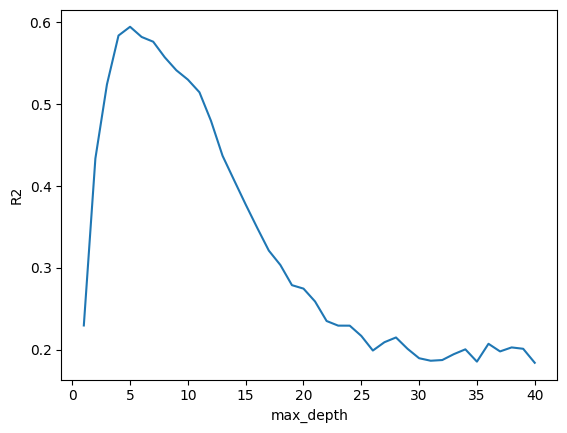

In [ ]:
plt.plot(depths, scoresdt["Test Score"])
plt.xlabel("max_depth") 
plt.ylabel("R2");

## According to this Decision Tree Model, the optimized depth for best fit Model is at 5. 

#This provides the Regression Tree R2 Score

In [ ]:
train_r3 = r2_score(y_train, train_pred)
test_r3 = r2_score(y_test, test_pred)

print(f"Model Training R2:{train_r3}")
print(f"Model Testing R2: {test_r3}")

Model Training R2:0.5615551260381082
Model Testing R2: 0.5671049487900051


# This provides the RMSE Score

In [ ]:
train_RMSE3 = np.sqrt(train_MSE)
test_RMSE3 = np.sqrt(test_MSE)

print(f"Model Training RMSE: {train_RMSE3}")
print(f"Model Testing RMSE: {test_RMSE3}")

Model Training RMSE: 1139.1041143666143
Model Testing RMSE: 1092.8621204398453


## Based on the R2 Scores my recommendation is to use the Regression Tree Model for predicting future Item Outlet Sales Trends.